In [1]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import sklearn
from sklearn import metrics
#from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PCCR = pd.read_csv(r'PCCR.csv', sep = ',')
PCCR.drop('Unnamed: 0', axis=1, inplace=True)
PCCR = PCCR.rename(columns={PCCR.columns[0]: 'DRG'})
PCCR = PCCR.rename(columns={PCCR.columns[56]: 'DRG_DESC'})
PCCR = PCCR.fillna(0)

In [3]:
PCCR['PCCR_OR_and_Anesth_Costs']=PCCR.apply(lambda row: row['3700 Operating Room'] + row['4000 Anesthesiology'], axis=1)
PCCR = PCCR.loc[~(PCCR['DRG'] == 0),:]

In [4]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=2).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_2 = metrics.calinski_harabaz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [5]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=3).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_3 = metrics.calinski_harabaz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [6]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=4).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_4 = metrics.calinski_harabaz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [7]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=5).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_5 = metrics.calinski_harabaz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)

In [8]:
pccr = PCCR[['DRG','DRG_DESC','PCCR_OR_and_Anesth_Costs']].copy()
kmeans = KMeans(n_clusters=3).fit(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1))
labels = kmeans.labels_
pccr['clusters']=labels
chscore_3 = metrics.calinski_harabaz_score(pccr['PCCR_OR_and_Anesth_Costs'].values.reshape(-1,1),labels)
pccr.to_csv('pccrc',index=False)

Text(0, 0.5, 'PCCR_OR_and_Anesth_Costs')

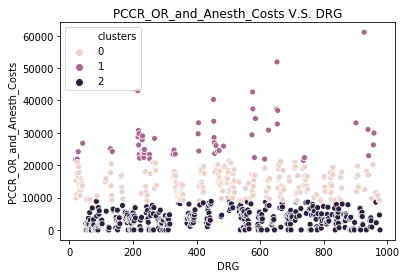

In [9]:
sns.scatterplot(x='DRG', y='PCCR_OR_and_Anesth_Costs',
                hue = 'clusters',
                data=pccr)
plt.title('PCCR_OR_and_Anesth_Costs V.S. DRG')
plt.xlabel('DRG')
plt.ylabel('PCCR_OR_and_Anesth_Costs')